In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
data_path = '/Users/tianhonggao/Desktop/intent_analysis/en-US.jsonl'
data = []
with open(data_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [3]:
train_data = [entry for entry in data if entry["partition"] == "train"]
val_data = [entry for entry in data if entry["partition"] == "dev"]
test_data = [entry for entry in data if entry["partition"] == "test"]

trainset = [entry["scenario"] + " <|> " + entry["utt"] for entry in train_data]
valset = [entry["scenario"] + " <|> " + entry["utt"] for entry in val_data]
testset = [entry["scenario"] + " <|> " + entry["utt"] for entry in test_data]

train_label = [entry["intent"] for entry in train_data]
val_label = [entry["intent"] for entry in val_data]
test_label = [entry["intent"] for entry in test_data]

In [4]:
print(f'Number of training data: {len(trainset)}')
print(f'Number of validation data: {len(valset)}')
print(f'Number of testing data: {len(testset)}')
print(f'Size of training labels: {len(train_label)}')
print(f'Size of validation labels: {len(val_label)}')
print(f'Size of testing labels: {len(test_label)}')

Number of training data: 11514
Number of validation data: 2033
Number of testing data: 2974
Size of training labels: 11514
Size of validation labels: 2033
Size of testing labels: 2974


In [5]:
unique_intents = sorted(list(set(train_label + val_label)))

print(unique_intents)
print(f'Number of intents: {len(unique_intents)}')

['alarm_query', 'alarm_remove', 'alarm_set', 'audio_volume_down', 'audio_volume_mute', 'audio_volume_other', 'audio_volume_up', 'calendar_query', 'calendar_remove', 'calendar_set', 'cooking_query', 'cooking_recipe', 'datetime_convert', 'datetime_query', 'email_addcontact', 'email_query', 'email_querycontact', 'email_sendemail', 'general_greet', 'general_joke', 'general_quirky', 'iot_cleaning', 'iot_coffee', 'iot_hue_lightchange', 'iot_hue_lightdim', 'iot_hue_lightoff', 'iot_hue_lighton', 'iot_hue_lightup', 'iot_wemo_off', 'iot_wemo_on', 'lists_createoradd', 'lists_query', 'lists_remove', 'music_dislikeness', 'music_likeness', 'music_query', 'music_settings', 'news_query', 'play_audiobook', 'play_game', 'play_music', 'play_podcasts', 'play_radio', 'qa_currency', 'qa_definition', 'qa_factoid', 'qa_maths', 'qa_stock', 'recommendation_events', 'recommendation_locations', 'recommendation_movies', 'social_post', 'social_query', 'takeaway_order', 'takeaway_query', 'transport_query', 'transpor

In [6]:
intent_to_id = {intent: i for i, intent in enumerate(unique_intents)}
id_to_intent = {i: intent for intent, i in intent_to_id.items()}
print(intent_to_id['iot_hue_lightup'])
print(id_to_intent[27])

27
iot_hue_lightup


In [7]:
label_statistics = {}
for intent_type in unique_intents:
    label_statistics[intent_type] = sum(entry["intent"] == intent_type for entry in data)

label_statistics = dict(sorted(label_statistics.items(), key=lambda x : x[1]))
print(label_statistics)

{'cooking_query': 6, 'music_dislikeness': 20, 'audio_volume_other': 24, 'general_greet': 28, 'iot_hue_lighton': 30, 'iot_wemo_on': 65, 'music_settings': 65, 'audio_volume_down': 71, 'email_addcontact': 71, 'iot_wemo_off': 75, 'datetime_convert': 76, 'recommendation_movies': 102, 'general_joke': 106, 'alarm_remove': 113, 'iot_hue_lightdim': 114, 'iot_hue_lightup': 115, 'qa_maths': 116, 'audio_volume_up': 135, 'iot_cleaning': 138, 'transport_taxi': 150, 'social_query': 151, 'transport_traffic': 154, 'audio_volume_mute': 157, 'music_likeness': 165, 'email_querycontact': 169, 'play_game': 169, 'iot_coffee': 174, 'takeaway_order': 177, 'takeaway_query': 181, 'alarm_query': 183, 'iot_hue_lightchange': 183, 'transport_ticket': 187, 'qa_stock': 202, 'iot_hue_lightoff': 213, 'qa_currency': 213, 'music_query': 219, 'play_audiobook': 226, 'recommendation_locations': 235, 'lists_createoradd': 241, 'lists_remove': 253, 'alarm_set': 254, 'recommendation_events': 259, 'play_podcasts': 290, 'lists_que

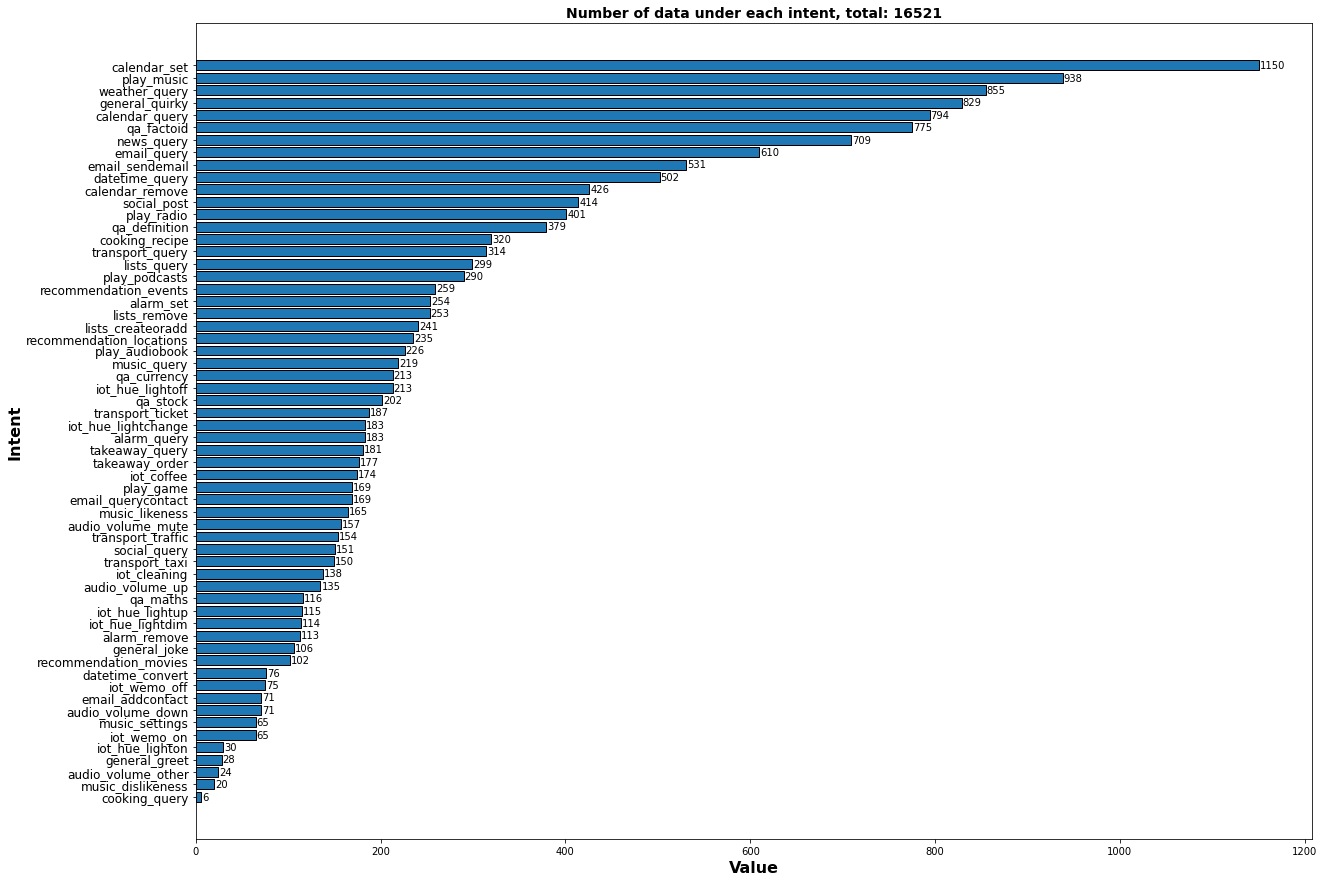

In [11]:
# Plot the horizontal bar plot
plt.figure(figsize=(20, 15))
barplot = plt.barh(list(label_statistics.keys()), list(label_statistics.values()), edgecolor='black')

plt.xlabel('Value', fontsize=16, fontweight='bold')
plt.ylabel('Intent', fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Number of data under each intent, total: 16521', fontsize=14, fontweight='bold')
# Function to add value labels to the bars
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1,  # Set the label position slightly right of the bar end
                 bar.get_y() + bar.get_height() / 2,  # Set the label position vertically centered within the bar
                 f'{width}',  # The value to display as text
                 ha='left',  # Horizontal alignment
                 va='center',  # Vertical alignment
                 fontsize=10)

# Add value labels to the bars
add_value_labels(barplot)
# plt.savefig('statistics.pdf', format='pdf', bbox_inches='tight')
plt.savefig('statistics.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

In [9]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF

def convert_svg_to_pdf(svg_filename, pdf_filename):
    # Load the SVG file
    drawing = svg2rlg(svg_filename)

    # Convert the SVG file to a PDF file
    renderPDF.drawToFile(drawing, pdf_filename)

In [10]:
convert_svg_to_pdf('statistics.svg', 'statistics.pdf')

In [43]:
from PIL import Image

# Open the input image
input_image = Image.open("download.png")
print(f'Width: {input_image.width}')
print(f'Height: {input_image.height}')

# Define the new width and height for the resized image
new_width = 1189
new_height = 650

# Resize the image
input_image = input_image.resize((new_width, new_height))
# Convert the image to RGB mode (required for PDF conversion)
rgb_image = input_image.convert("RGB")

# Save the image as a PDF
rgb_image.save("output_image.pdf", "PDF")


Width: 1189
Height: 790
